In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data 

In [3]:
data = pd.read_csv('weatherHistory.csv')

In [4]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [5]:
data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [6]:
data.shape

(96453, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
categorical_cols = data.select_dtypes(include = ['object']).columns

# loop through each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    print(data[col].unique())   
    print("-" * 50)  

Column: Formatted Date
['2006-04-01 00:00:00.000 +0200' '2006-04-01 01:00:00.000 +0200'
 '2006-04-01 02:00:00.000 +0200' ... '2016-09-09 21:00:00.000 +0200'
 '2016-09-09 22:00:00.000 +0200' '2016-09-09 23:00:00.000 +0200']
--------------------------------------------------
Column: Summary
['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']
--------------------------------------------------
Column: Precip Type
['rain' 'snow' nan]
--------------------------------------------------
Column: Daily Summary
['Partly cloudy throughout the day.' 'Mostly cl

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [10]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [11]:
data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace = True)

In [12]:
print(data.duplicated().sum())

24


In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data['Loud Cover'].value_counts()

Loud Cover
0.0    96429
Name: count, dtype: int64

In [15]:
data.drop(['Formatted Date', 'Daily Summary', 'Loud Cover'], axis = 1, inplace = True)

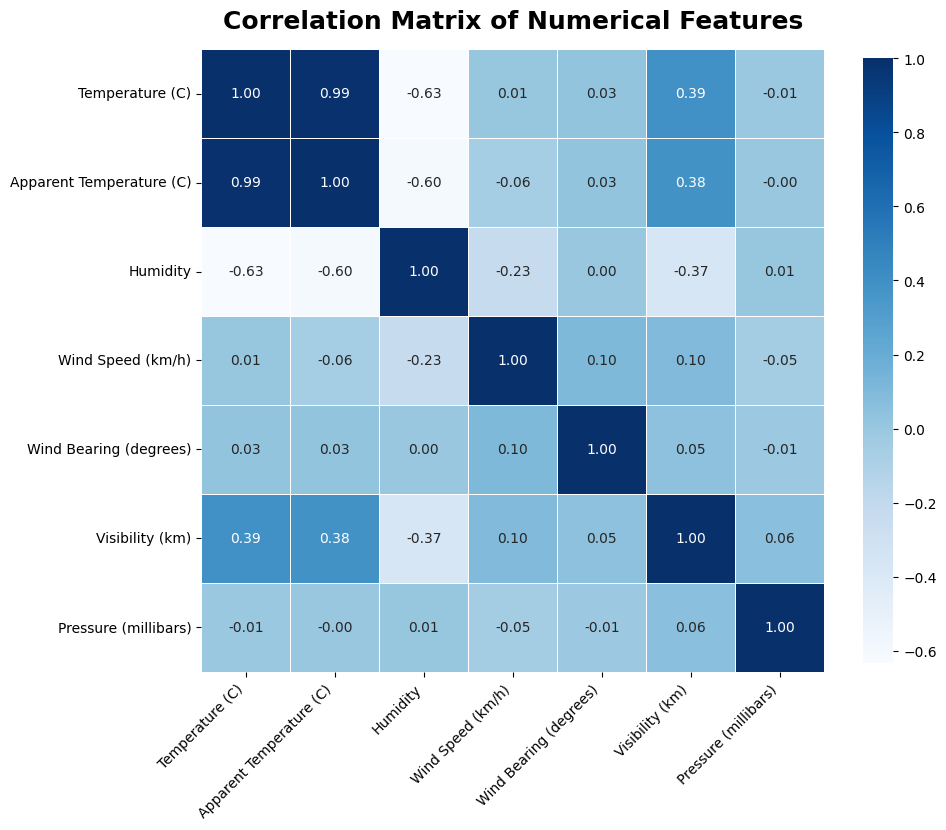

In [16]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 9))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [17]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


## Encoding categorical Features 

In [18]:
categorical_cols = data.select_dtypes(include = ['object']).columns

# loop through each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    print(data[col].unique())   
    print("-" * 50)  

Column: Summary
['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']
--------------------------------------------------
Column: Precip Type
['rain' 'snow']
--------------------------------------------------


In [17]:
onehot_encoder = OneHotEncoder(sparse_output = False)
encoded_data = onehot_encoder.fit_transform(data[['Summary']])
encoded_df = pd.DataFrame(encoded_data, columns = onehot_encoder.get_feature_names_out(['Summary']))

data = pd.concat([data.drop('Summary', axis = 1), encoded_df], axis = 1)

In [18]:
label_encoder = LabelEncoder()
data['Precip Type'] = label_encoder.fit_transform(data['Precip Type'])

In [19]:
data

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36091,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36092,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36093,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36094,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data.isna().sum()

Precip Type                                     0
Temperature (C)                                24
Apparent Temperature (C)                       24
Humidity                                       24
Wind Speed (km/h)                              24
Wind Bearing (degrees)                         24
Visibility (km)                                24
Pressure (millibars)                           24
Summary_Breezy                                 24
Summary_Breezy and Dry                         24
Summary_Breezy and Foggy                       24
Summary_Breezy and Mostly Cloudy               24
Summary_Breezy and Overcast                    24
Summary_Breezy and Partly Cloudy               24
Summary_Clear                                  24
Summary_Dangerously Windy and Partly Cloudy    24
Summary_Drizzle                                24
Summary_Dry                                    24
Summary_Dry and Mostly Cloudy                  24
Summary_Dry and Partly Cloudy                  24


In [21]:
data.dropna(inplace = True) 

## Spliting Training and Testing Set

In [22]:
X = data.drop('Temperature (C)', axis = 1).values
y = data['Temperature (C)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [23]:
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

---

## Model Implementation

### Linear Regression 

In [42]:
linear = LinearRegression()
linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred = linear.predict(X_test)

In [44]:
print("MSE :", mean_squared_error(y_test, y_pred))
print("R Square :",r2_score(y_test, y_pred))

MSE : 0.8816651070634256
R Square : 0.9902822949823127


In [ ]:
print(f"Training R² Score: {r2_score(y_train, linear.predict(X_train))}")
print(f"Testing R² Score: {r2_score(y_test, linear.predict(X_test))}")

Training R² Score: 0.9901555375088233
Testing R² Score: 0.9902822949823127


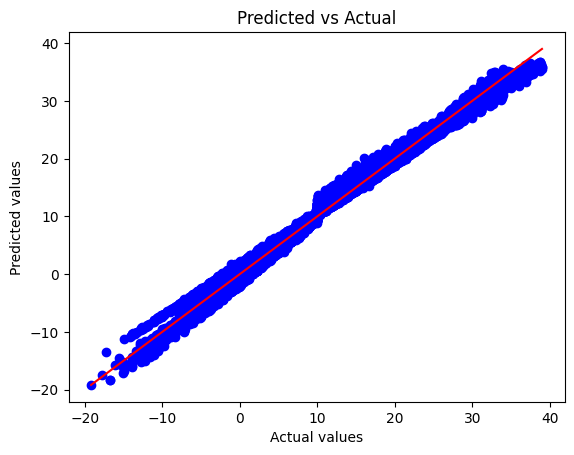

In [46]:
plt.scatter(y_test, y_pred, color = "Blue")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red")  # perfect fit line
plt.show()

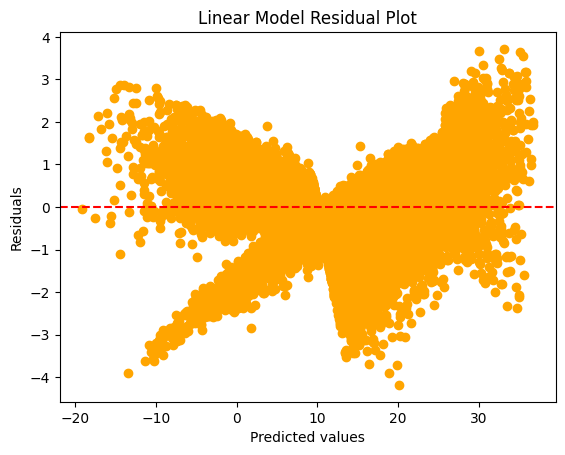

In [54]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color="orange")
plt.axhline(y = 0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linear Model Residual Plot")
plt.show()

The predicted vs actual plot demonstrates that the model performs well in terms of accuracy, as most of the predicted values lie close to the diagonal line, indicating strong agreement between predictions and actual values. However, despite this good predictive performance, the issue observed in the residual plot highlights that the model’s assumptions are not fully satisfied. This makes the predictions less reliable for inference, suggesting that model improvements—such as transformations, polynomial features, or more flexible algorithms—might be necessary.

The residual plot shows a clear butterfly-like pattern rather than a random scatter around zero, which indicates the presence of heteroscedasticity. This means the variance of the errors changes depending on the predicted values, violating one of the key assumptions of linear regression. Such a pattern also suggests that the model might not be capturing some underlying non-linear relationships in the data, leading to systematic bias in certain regions. Ideally, residuals should appear randomly distributed with constant spread, but here the structure shows otherwis

---

### Decision Tree

In [48]:
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(X_train, y_train) 

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [49]:
DT_y_pred = DT.predict(X_test)

In [50]:
print("MSE :", mean_squared_error(y_test, DT_y_pred))
print("R Square :",r2_score(y_test, DT_y_pred))

MSE : 0.006764188157122351
R Square : 0.9999254451779157


In [51]:
print(f"Training R² Score: {r2_score(y_train, DT.predict(X_train))}")
print(f"Testing R² Score: {r2_score(y_test, DT.predict(X_test))}")

Training R² Score: 1.0
Testing R² Score: 0.9999254451779157


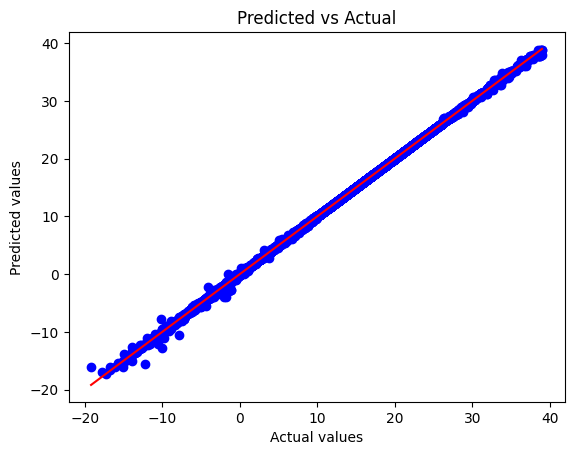

In [52]:
plt.scatter(y_test, DT_y_pred, color = "Blue")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red")  # perfect fit line
plt.show()

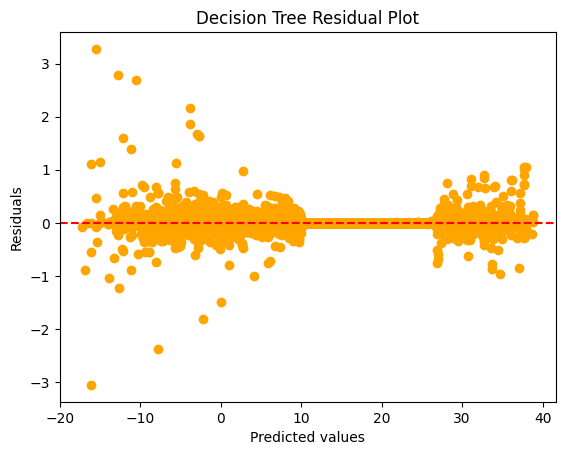

In [55]:
residuals = y_test - DT_y_pred

plt.scatter(DT_y_pred, residuals, color="orange")
plt.axhline(y = 0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Decision Tree Residual Plot")
plt.show()

After switching to a Decision Tree model, the residual plot changed significantly compared to the linear regression case. The residuals are now much more tightly clustered around zero, indicating that the tree fits the data better and reduces overall bias. However, the plot shows clear blocks or clusters of residuals instead of a smooth, random scatter, which reflects the stepwise, piecewise-constant nature of decision tree predictions. This behavior suggests that while the model captures patterns more effectively than linear regression, it may also be overfitting or lacking smooth generalization, especially if predictions jump between discrete values.

---

### Random Forest

In [24]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
RF_y_pred = RF.predict(X_test)

In [28]:
print("MSE :", mean_squared_error(y_test, RF_y_pred))
print("R Square :",r2_score(y_test, RF_y_pred))

MSE : 0.0030619054361043755
R Square : 0.9999662517053451


In [30]:
print(f"Training R² Score: {r2_score(y_train, RF.predict(X_train))}")
print(f"Testing R² Score: {r2_score(y_test, RF.predict(X_test))}")

Training R² Score: 0.9999965408757695
Testing R² Score: 0.9999662517053451


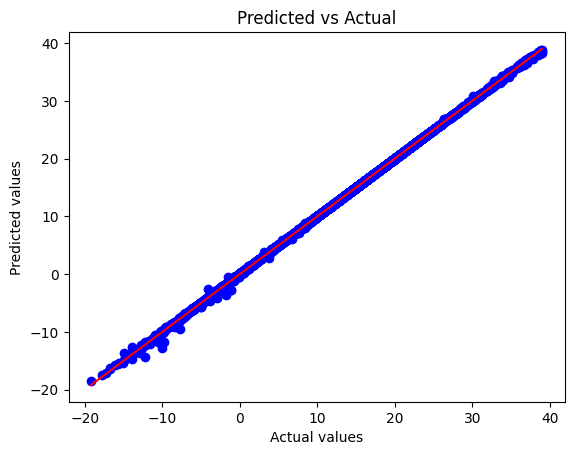

In [31]:
plt.scatter(y_test, RF_y_pred, color = "Blue")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red")  # perfect fit line
plt.show()

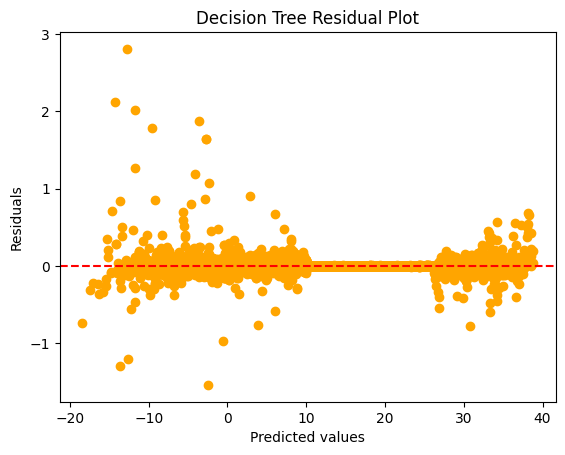

In [33]:
residuals = y_test - RF_y_pred

plt.scatter(RF_y_pred, residuals, color="orange")
plt.axhline(y = 0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Decision Tree Residual Plot")
plt.show()

After switching from a single Decision Tree to a Random Forest, the residual plot changed noticeably. Instead of the distinct bands and stepwise patterns seen with the tree, the residuals in the Random Forest plot are now more smoothly and randomly scattered around zero. This happens because Random Forest averages the predictions of many different trees, reducing the sharp jumps in values and producing smoother, more continuous outputs. As a result, the errors are better balanced, with no obvious structure or systematic bias, which indicates that the model generalizes better to unseen data. In short, Random Forest reduces variance, mitigates overfitting, and provides a more reliable fit compared to a single decision tree.